1. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
2. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).
3. __Use the__ `Validate` __button in the Assignments tab before submitting__.

__Include comments, derivations, explanations, graphs, etc.__ 

You __work in groups__ (= 3 people). __Write the full name and S/U-number of all team members!__

---

# Assignment 3 (Statistical Machine Learning 2024)
# **Deadline: 22 November 2024**

## Instructions
* Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE` __including comments, derivations, explanations, graphs, etc.__ 
Elements and/or intermediate steps required to derive the answer have to be in the report. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends.
* __Please use LaTeX to write down equations/derivations/other math__! How to do that in Markdown cells can be found [here](https://www.fabriziomusacchio.com/blog/2021-08-10-How_to_use_LaTeX_in_Markdown/), a starting point for various symbols is [here](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* Please do __not add new cells__ to the notebook, try to write the answers only in the provided cells. Before you turn the assignment in, make sure everything runs as expected.
* __Use the variable names given in the exercises__, do not assign your own variable names. 
* __Only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.

For any problems or questions regarding the assignments, ask during the tutorial or send an email to charlotte.cambiervannooten@ru.nl and janneke.verbeek@ru.nl .

## Introduction
Assignment 3 consists of:
1. The faulty lighthouse (30 points);
2. Gaussian processes (40 points);
3. __Bayesian polynomial regression (30 points)__.

## Libraries

Please __avoid installing new packages__, unless really necessary.

In [142]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

import numpy as np
import matplotlib.pyplot as plt

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Bayesian polynomial regression (30 points)
In this exercise, we will consider the _Bayesian_ treatment of polynomial regression. Recall polynomial regression 
\begin{equation}
t_{n} = \omega_{0} + \omega_{1}x_{n} + \omega_{2} x_{x}^{2}+\dots+\omega_{M}x_{n}^{M}+\epsilon_{n}, 
\end{equation}
where $\epsilon_{n}\sim N(0, \sigma^{2})$. In the vector form we have 
\begin{equation}
t_{n} = \boldsymbol{\omega}^{T}\boldsymbol{x}_{n}+\epsilon_{n}, 
\end{equation}
where $\boldsymbol{\omega}=[\omega_{0}, \dots, \omega_{M}]^{T}$ and $\boldsymbol{x}_{n}=[1,x_{n}, x_{n}^{2}, \dots, x_{n}^{M}]$. Further, let us stack all responses in one vector $\boldsymbol{t}=[t_{1}, \dots, t_{N}]^{T}$, all inputs in a single matrix $\boldsymbol{X}=[\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, \dots, \boldsymbol{x}_{N}]^{T}$. Then we get for the whole data set
\begin{equation}
\boldsymbol{t}=\boldsymbol{X}\boldsymbol{\omega}+\boldsymbol{\epsilon},
\end{equation}
where $\boldsymbol{\epsilon}=[\epsilon_{1}, \dots, \epsilon_{N}]^{T}$. 
Assume that we know the true value of  $\sigma^{2}$. 

1. Derive the posterior distribution of $\boldsymbol{\omega}$, i.e., $p(\boldsymbol{\omega}|\boldsymbol{t}, \boldsymbol{X}, \sigma^{2})$.  
Hint: Use the prior $p(\boldsymbol{\omega}|\boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})=\mathcal{N}(\boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})$ and the fact that the posterior should be Gaussian. 

YOUR ANSWER HERE

We use Bayes' rule to see which quantities must be estimated to find the posterior distribution over $\mathbf{\omega}$:

\begin{equation}
p(\mathbf{\omega \mid t, X}, \sigma^2) = \frac{p(\mathbf{t} \mid \mathbf{X}, \sigma^2, \mathbf{\omega}) p(\mathbf{\omega} \mid \mathbf{\mu_0}, \mathbf{\Sigma_0})}{p(\mathbf{t, X}, \sigma^2)}
\end{equation}

The two quantities we want are the prior and likelihood in the top section. The prior is given by the exercise hint.
We will now obtain the likelihood, using the equation for $\mathbf{t}$:

\begin{align}
\mathbf{t} &= \mathbf{X\omega + \epsilon} \\
&= \mathbf{X \omega} + N(\epsilon \mid 0, \sigma^2) \\
&= N(t \mid X\omega, \sigma^2)
\end{align}

We can write these distributions out:
\begin{align}
p(\mathbf{\omega \mid t, X}, \sigma^2) & \propto N(\mathbf{t} \mid \mathbf{X\omega}, \sigma^2) N(\mathbf{\omega} \mid \mathbf{\mu_0, \Sigma_0}) \\
&= \left(\frac{1}{2 \pi \sigma^2}\right)^{N/2}e^{-\frac{1}{2}(\mathbf{X\omega}-\mathbf{t})^T\sigma^{-2}(\mathbf{X\omega}-\mathbf{t})} \left( \frac{1}{2 \pi \det{\Sigma_0}}\right)^{M/2}e^{-\frac{1}{2}(\mathbf{\omega}-\mathbf{\mu_0})^T\mathbf{\Sigma_0}^{-1}({\omega}-\mathbf{\mu_0})}
\end{align}


And as usual, the marginal distribution is found by integrating over the prior and likelihood, giving this final formula for the posterior over $\mathbf{\omega}$:

\begin{equation}
p(\mathbf{\omega \mid t, X}, \sigma^2) = \frac{\left(\frac{1}{2 \pi \sigma^2}\right)^{N/2}e^{-\frac{1}{2}(\mathbf{X\omega}-\mathbf{t})^T\sigma^{-2}(\mathbf{X\omega}-\mathbf{t})} \left( \frac{1}{2 \pi \det{\Sigma_0}}\right)^{M/2}e^{-\frac{1}{2}(\mathbf{\omega}-\mathbf{\mu_0})^T\mathbf{\Sigma_0}^{-1}({\omega}-\mathbf{\mu_0})}}{\int \left(\frac{1}{2 \pi \sigma^2}\right)^{N/2}e^{-\frac{1}{2}(\mathbf{X\omega}-\mathbf{t})^T\sigma^{-2}(\mathbf{X\omega}-\mathbf{t})} \left( \frac{1}{2 \pi \det{\Sigma_0}}\right)^{M/2}e^{-\frac{1}{2}(\mathbf{\omega}-\mathbf{\mu_0})^T\mathbf{\Sigma_0}^{-1}({\omega}-\mathbf{\mu_0})} \mathrm{d} \mathbf{\omega}}
\end{equation}

2. Take the first order polynomial, the inputs are $\boldsymbol{x_{n}}=[1, x_{n}]^{T}$. Let $\boldsymbol{\mu_{0}}=[0,0,\dots,0]^{T}$. Then the posterior mean for the linear Gaussian model is
\begin{equation}
\boldsymbol{\mu_{\omega}}=(\boldsymbol{X}^{T}\boldsymbol{X}+ \sigma^2 \boldsymbol{\Sigma_{0}^{-1}})^{-1}\boldsymbol{X}^{T}\boldsymbol{t}.
\label{eq:MAP} \tag{1}
\end{equation}
Recall also the regularized least squares solution:
\begin{equation}
\hat{\boldsymbol{\omega}}=(\boldsymbol{X}^{T}\boldsymbol{X}+N\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^{T}\boldsymbol{t}.
\label{eq:MLE} \tag{2}
\end{equation}
Find $\boldsymbol{\Sigma_{0}}$ that makes Equation \eqref{eq:MAP} and Equation \eqref{eq:MLE} identical. Reflect on the similarity between MAP solution and regularized least squares. Comment on what it implies for the effect of the prior.

YOUR ANSWER HERE

In the equations $\boldsymbol{\mu_{\omega}}=(\boldsymbol{X}^{T}\boldsymbol{X}+ \sigma^2 \boldsymbol{\Sigma_{0}^{-1}})^{-1}\boldsymbol{X}^{T}\boldsymbol{t}$ and $\hat{\boldsymbol{\omega}}=(\boldsymbol{X}^{T}\boldsymbol{X}+N\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^{T}\boldsymbol{t}$, we can start by isolating the sections concerning $\Sigma_0$, and set them equal to each other:

\begin{equation}
\sigma^2\Sigma_0^{-1} = N\lambda \boldsymbol{I}
\end{equation}

From here, it's algebra:

\begin{align}
\sigma^2\Sigma_0^{-1} &= N\lambda \boldsymbol{I} \\
\sigma^2 &= N\lambda \boldsymbol{I} \Sigma_0 \\
\frac{\sigma^2}{N \lambda} &= \boldsymbol{I} \Sigma_0 \\
\boldsymbol{I}^{-1} \frac{\sigma^2}{N \lambda}&= \Sigma_0 \\
\Sigma_0 &= \boldsymbol{I} \frac{\sigma^2}{N \lambda}

\end{align}



Let's consider what happens as the prior grows smaller. That is, consider $\Sigma_0 = \alpha \Sigma_p$, as $\alpha \rightarrow 0$. This would mean that the effect of the prior also goes to zero (and same for $\sigma^2$, the observation noise). Then, we would land on the a olution that looks very much like the Maximum Likelihood solution, $(X^TX)^{-1}X^Tt$ eq. (3.15) in Bishop. However, let us stay for now on MAP and regularization. The effect of the prior covariance seems therefore to be considered analogous to that of the regularization constant; if we choose our $\Sigma_0$ to be inversely proportional to our number of data points, as well as some regularizing factor $\lambda$, then we are doing the same as we would in (quadratic) regularization.

3. Consider the polynomial function
\begin{equation}
f(x) = 5x^{3} - x^{2} +x
\end{equation}
which we will use to generate some training data. First define the function $f$.

In [143]:
def f(x):
    """
    Define the polynomial function f(x).
    """
    # YOUR CODE HERE
    return 5*x**3 - x**2 + x

In [144]:
"""
Test the polynomial function f(x).
"""
assert f(0) == 0
assert f(1) == 5
assert f(-1) == -7

Generate 40 random input points uniformly distributed on the interval $[-5, 5]$. Apply the function $f$ to the input data and then add Gaussian noise with mean zero and variance $\sigma^2 = 150$ to obtain the target values ($\boldsymbol{t}$). Plot the generated data on top of the true function $f(x)$ over the interval $[-5,5]$.

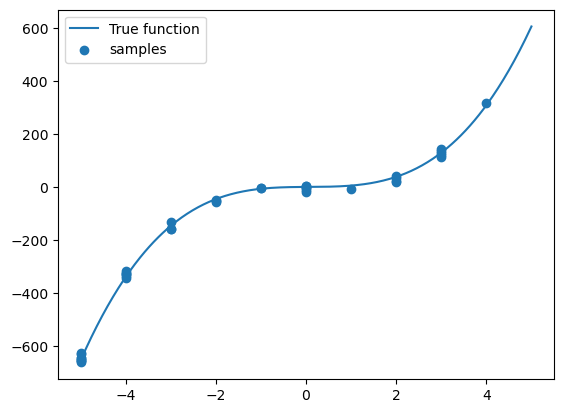

In [145]:
"""
Generate 40 (X, t) pairs as described above and plot them (for comparison) on top of the function f(x).

Variable names
----------
X : Nx1 array
    The array containing the random data points.
N : integer
    The number of data points.
t : Nx1 array
    The array containing the random data points with Gaussian noise.
"""
# YOUR CODE HERE
# 40 random input points:
num_data_points = 40
xs = np.atleast_2d(np.random.randint(-5, 5, num_data_points))

# apply the function and add noise
var = 150
ts = f(xs) + np.random.normal(0, np.sqrt(var), num_data_points)

axis = np.linspace(-5, 5, 500)
plt.plot(axis, f(axis), label="True function")
plt.scatter(xs, ts, label="samples")
plt.legend()
plt.show()

4. Compute the marginal likelihood on the data generated above for the polynomial models from first to seventh order. Make a plot of the marginal likelihood for these models (polynomial order on the x-axis and marginal likelihood value on the y-axis). Use a Gaussian prior on $\boldsymbol{\omega}$ with **zero mean** ($\boldsymbol{\mu_0} = \boldsymbol{0}$) and a **diagonal covariance matrix** ($\boldsymbol{\Sigma_0} = \sigma_0^2 \boldsymbol{I}$), and set the prior covariance hyperparameter $\sigma_0^2$ (initially) to one. 

_Hint:_ 
The marginal likelihood (also known as the model evidence) for our Gaussian model is defined as $p(\boldsymbol{t}|\boldsymbol{X}, \boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})$. The data matrix $\boldsymbol{X}$ is defined at the beginning of the exercise. Note that this matrix is _order dependent_ and is different from the array of data points $\{x_1, x_2, ..., x_{40}\}$. Using Gaussian distributions as before we can compute
\begin{equation}
p(\boldsymbol{t}|\boldsymbol{X}, \boldsymbol{\mu_{0}}, \boldsymbol{\Sigma_{0}})= \mathcal{N}(\boldsymbol{t}; \boldsymbol{X}\boldsymbol{\mu_{0}}, \sigma^{2}\boldsymbol{I}_{N}+\boldsymbol{X}\boldsymbol{\Sigma_{0}}\boldsymbol{X}^{T}).
\end{equation}

In [146]:
def log_marginal_likelihood(X, N, t, sigma_0=1, sigma_n=1):
    """
    Calculate the log marginal likelihood for the polynomial models from first to seventh order.

    Parameters
    ----------
    X : Nx1 array
        The array containing the random data points.
    N : numeric
        The number of data points.
    t : Nx1 array
        The array containing the random data points with Gaussian noise.
    sigma_0: numeric
        Prior covariance hyperparameter.
    sigma_n: numeric
        Noise covariance hyperparameter

    Returns
    -------
    list
        The list contains seven log marginal likelihood values corresponding to the different polynomial orders 
        (from first to seventh order).
    """
    # YOUR CODE HERE

    orders = np.arange(1, 8)
    margs  = np.zeros(7)

    # NOTE: for a Bayesian linear regression model of the form y = X@Theta + epsilon, where epsilon represents the "sampling" noise of our data, we need a parameter for that sampling noise. In the equation above, that is, as far as I can tell, the $sigma^2$ (with NO sub-script). However, no guidance was given for this. Therefore, I set it to equal 150, which is the value for the "noise" given in one of the previous exercises. This is obviously unrealistic for a real project, where we don't know the true sampling noise...but in real Bayesian Linear Regression that's also a parameter that can be estimated, so...I think this is fine. If I were to estimate it I would set a gamma or exponential prior on it, related to the "span" of our data. Or I would just normalize this data and set the prior over this parameter to have a lot of density between 0.001 and 0.1.
    sigma_n = 150

    def lml(t, x, M, m0=0, sig_0=sigma_0):
        mu0 = np.full(M+1, m0)
        Sig_0 = np.eye(M+1)*np.sqrt(sig_0)
        mean = x@mu0
        cov = sigma_n*np.eye(N)+x@Sig_0@x.T

        # get lognormal distribution: 
        sign, log_det_sigma_0 = np.linalg.slogdet(cov)
        diff = t - mean
        cov_inv = np.linalg.inv(cov)
        ll = -0.5 * (diff@cov_inv@diff.T + N * (np.log(2*np.pi) + log_det_sigma_0))

        return ll.item()
    
    for i, M in enumerate(orders):
        # construct data matrix
        x = np.zeros((N, M+1))
        for j in range(M+1):
            x[:,j] = X**j

        # get log marginal likelihoods
        margs[i] = (lml(t, x, M))

    return list(margs)

In [147]:
"""
Test for log_marginal_likelihood.
"""
assert type(log_marginal_likelihood(np.full((1, 1), 0), 1, np.full((1, 1), 0))) is list

Now plot the results with the help of `log_marginal_likelihood`. You can use `matplotlib.pyplot.bar` for making the bar plot.  

_Hint_: You might want to normalize by computing the difference between the log marginal likelihood values and their maximum, and by then taking the exponent of these differences.

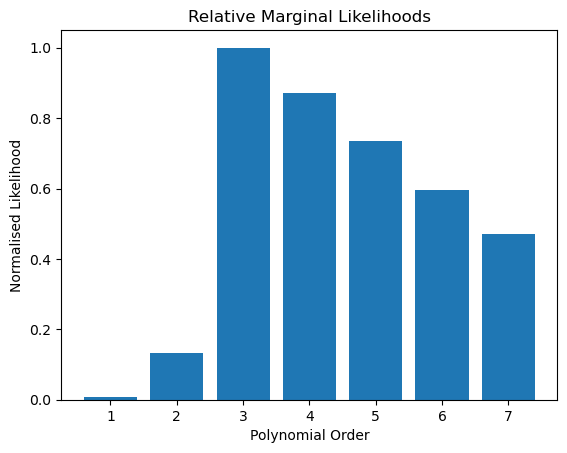

In [148]:
"""
Plot the marginal likelihood values for different polynomial orders.
"""
# YOUR CODE HERE

margs = log_marginal_likelihood(xs, num_data_points, ts)
diffs = margs - np.max(margs)
# I was running into numerical overflow issues, so doing this to make an actual readable plot while still maintaining relative evidence:
diffs=diffs/1000

plt.bar(np.arange(1,8), np.exp(diffs))
plt.xlabel("Polynomial Order")
plt.ylabel("Normalised Likelihood")
plt.title("Relative Marginal Likelihoods")
plt.show()

Based on the plot, which model would you choose according to the marginal likelihood?  

Based on this plot, I would prefer model 3 - the third degree polynomial. This makes sense, as our function is indeed a 3rd degree polynomial.

5. How would the prior affect the choice of polynomial using marginal likelihood? Let $\boldsymbol{\Sigma_{0}}=\sigma_{0}^{2}\boldsymbol{I}$ as before and vary $\sigma_{0}^{2}$. What happens when you increase and decrease $\sigma_{0}^{2}$? Plot the marginal likelihood for each polynomial order from 1 to 7, for the following hyperparameter values: $\sigma_{0}^{2}=0.1$ , $\sigma_{0}^{2}=0.3$, $\sigma_{0}^{2}=0.4$, $\sigma_{0}^{2}=0.7$, $\sigma_{0}^{2}=1.3$, $\sigma_{0}^{2}=1.4$, $\sigma_{0}^{2}=1.7$.

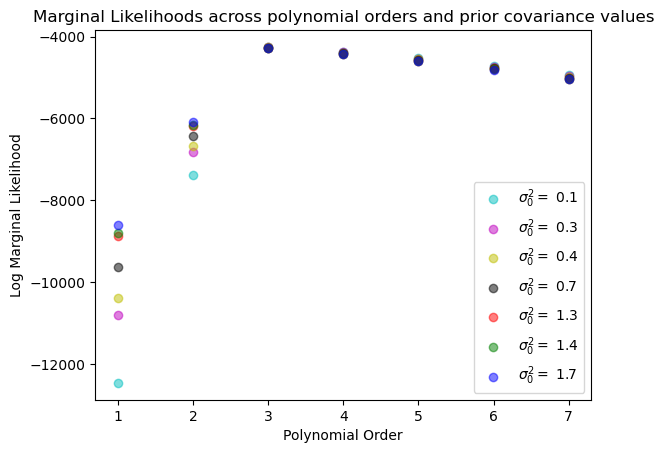

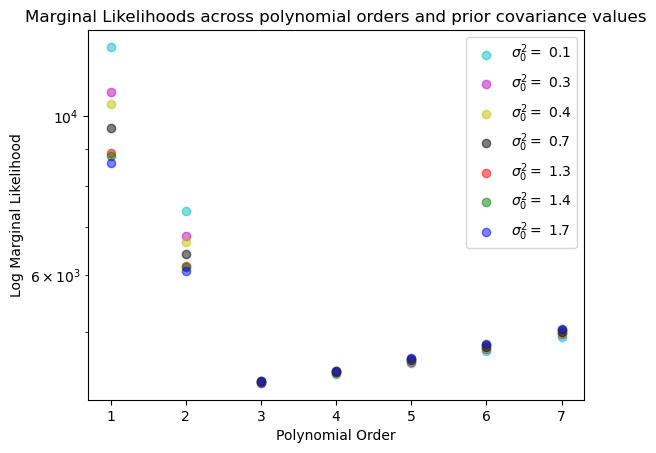

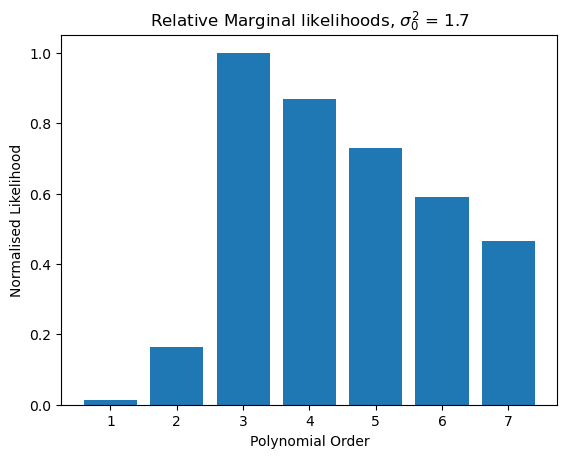

In [149]:
"""
Plot the marginal likelihood values for different polynomial orders. We now consider different values for sigma_0.
"""
# YOUR CODE HERE
hypersigmas = [0.1, 0.3, 0.4, 0.7, 1.3, 1.4, 1.7]

hypermargs = []
colors = ["c", "m", "y", "k", "r", "g", "b"]

for i, hypersigma in enumerate(hypersigmas):
  margs = log_marginal_likelihood(xs, num_data_points, ts, hypersigma)
  hypermargs.append(margs)
  plt.scatter(np.arange(1,8), margs, label=rf"$\sigma_0^2 =$ {hypersigma}", color=colors[i], alpha=0.5)

plt.xlabel("Polynomial Order")
plt.ylabel("Log Marginal Likelihood")
plt.title("Marginal Likelihoods across polynomial orders and prior covariance values")
plt.legend()
plt.show()

"""
Plot the marginal likelihood values for different polynomial orders. We now consider different values for sigma_0.
"""
# YOUR CODE HERE
hypersigmas = [0.1, 0.3, 0.4, 0.7, 1.3, 1.4, 1.7]

hypermargs = []
colors = ["c", "m", "y", "k", "r", "g", "b"]

for i, hypersigma in enumerate(hypersigmas):
  margs = log_marginal_likelihood(xs, num_data_points, ts, hypersigma)
  hypermargs.append(margs)
  plt.scatter(np.arange(1,8), -np.asarray(margs), label=rf"$\sigma_0^2 =$ {hypersigma}", color=colors[i], alpha=0.5)
  plt.yscale("log")

plt.xlabel("Polynomial Order")
plt.ylabel("Log Marginal Likelihood")
plt.title("Marginal Likelihoods across polynomial orders and prior covariance values")
plt.legend()
plt.show()


margs = hypermargs[-1]
diffs = margs - np.max(margs)
# I was running into numerical overflow issues, so doing this to make an actual readable plot while still maintaining relative evidence:
diffs=diffs/1000

plt.bar(np.arange(1,8), np.exp(diffs))
plt.xlabel("Polynomial Order")
plt.ylabel("Normalised Likelihood")
plt.title(rf"Relative Marginal likelihoods, $\sigma_0^2$ = 1.7")
plt.show()

Comment on the effect of changing $\sigma_{0}^{2}$. What does it imply, in general, for such a modeling choice (i.e. for the _Bayesian_ way of estimation for the polynomial regression)?

Please note that in the second plot, "lower" values are better. I did this to coerce matplotlib to draw a logarithmic y-axis. Regardless:

To me, it seems like the prior has a "regularizing" effect: it penalizes the more complex models, and gives an "advantage" to the less complex ones. In plot 2 we can see this in the "spread" of the differently coloured dots. For the simpler models (order 1 and 2), the prior with higher covariance $\sigma_0^2$ moves in the direction of more likely, while for the more complex models (especially visible in 7), it is the opposite; here, the dark blue dot is highest, and the light blue dot lowest (and reminder that in plot 2, lower is better).

This prompted me to also create the 3rd plot, which corroborates this interpretation: that the two less-complex models gained massively in relative likelihood, while the more complex ones lost (a little).

Note that this tracks with findings from earlier exercises from this assignment (ex.2).